<a href="https://colab.research.google.com/github/dpetrovic89/Game-of-Thrones-Episode-Analysis/blob/main/Game_of_Thrones_Episode_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Game of Thrones** is one of the world's most popular TV shows. 
 
Which season is the most popular? 

Is there are link between ratings and viewer figures? 

Do certain writers and directors make better episodes? 

Can you extract any relevant information from the episode descriptions?



# Explore Data: Beginning Data Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dpetrovic89/Game-of-Thrones-Episode-Analysis/main/got_data.csv')


In [3]:
# show first 5 rows
data.head()

,Season,Episode Number,Number in Season,Episode Name,Director,Writer,Original Air Date,US viewers (million),Runtime (mins),IMDB Description,IMDB votes,Imdb Rating,Notable Death Count
0,1,1,1,Winter Is Coming,Tim Van Patten,David Benioff & D. B. Weiss,"April 17, 2011",2.22,62,"Jon Arryn, the Hand of the King, is dead. King...",27685,9.0,4
1,1,2,2,The Kingsroad,Tim Van Patten,David Benioff & D. B. Weiss,"April 24, 2011",2.20,56,"While Bran recovers from his fall, Ned takes o...",21256,8.8,3
2,1,3,3,Lord Snow,Brian Kirk,David Benioff & D. B. Weiss,"May 1, 2011",2.44,58,Lord Stark and his daughters arrive at King's ...,20090,8.7,0
3,1,4,4,"Cripples, Bastards, and Broken Things",Brian Kirk,Bryan Cogman,"May 8, 2011",2.45,56,Eddard investigates Jon Arryn's murder. Jon be...,19123,8.8,1
4,1,5,5,The Wolf and the Lion,Brian Kirk,David Benioff & D. B. Weiss,"May 15, 2011",2.58,55,Catelyn has captured Tyrion and plans to bring...,20062,9.1,5


In [4]:
# 73 rows and 13 columns
data.shape

(73, 13)

In [5]:
# names of columns
data.columns

Index(['Season', 'Episode Number', 'Number in Season', 'Episode Name',
       'Director', 'Writer', 'Original Air Date', 'US viewers (million)',
       'Runtime (mins)', 'IMDB Description', 'IMDB votes', 'Imdb Rating',
       'Notable Death Count'],
      dtype='object')

In [6]:
# all numerical columns
with pd.option_context('display.max_rows', 8):
    display(data.describe(include=[np.number]).T)

# There is 8 seasonso of GoT and 73 episodes
# Average number of  US viewers are 6.44 millions, minimum was 2.2 and maximum was 13.61.
# Average runtime per episode is 57.72 minutes, minimum was 50 and max was 82.
# Imdb average votes per episode is 40185, min is 16496 and max was 216879
# Average Imdb rating is 8.89, min 4.1 and max is 9.9
# Deaths per episode was 3.17 on average, with max number 11.


,count,mean,std,min,25%,50%,75%,max
Season,73.0,4.205479,2.191897,1.0,2.0,4.00,6.00,8.00
Episode Number,73.0,37.000000,21.217131,1.0,19.0,37.00,55.00,73.00
Number in Season,73.0,5.191781,2.821827,1.0,3.0,5.00,7.00,10.00
US viewers (million),73.0,6.446712,2.825016,2.2,3.9,6.64,7.82,13.61
Runtime (mins),73.0,57.726027,7.251935,50.0,53.0,56.00,59.00,82.00
IMDB votes,73.0,40185.000000,44304.997159,16496.0,18075.0,23207.00,32906.00,216879.00
Imdb Rating,73.0,8.891781,0.931360,4.1,8.7,9.00,9.40,9.90
Notable Death Count,73.0,3.178082,2.394104,0.0,1.0,3.00,4.00,11.00


In [7]:
# all categorical columns
data.describe(include=[np.object, pd.Categorical]).T

# There is 8 Different Writers and 20 Directors
# David Benioff & D. B. Weiss have written most episodes 42 out of 73.
# David Nutter Directed most number of epiodes 9.
# First Episode is aired on May 15, 2011

,count,unique,top,freq
Episode Name,73,73,The Lion and the Rose,1
Director,73,20,David Nutter,9
Writer,73,8,David Benioff & D. B. Weiss,42
Original Air Date,73,73,"May 15, 2011",1
IMDB Description,73,73,Tyrion arrives at King's Landing to take his f...,1


In [8]:
# 0 missing values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Season                73 non-null     int64  
 1   Episode Number        73 non-null     int64  
 2   Number in Season      73 non-null     int64  
 3   Episode Name          73 non-null     object 
 4   Director              73 non-null     object 
 5   Writer                73 non-null     object 
 6   Original Air Date     73 non-null     object 
 7   US viewers (million)  73 non-null     float64
 8   Runtime (mins)        73 non-null     int64  
 9   IMDB Description      73 non-null     object 
 10  IMDB votes            73 non-null     int64  
 11  Imdb Rating           73 non-null     float64
 12  Notable Death Count   73 non-null     int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 7.5+ KB


In [9]:
# 0 missing values
data.isnull().sum().sum()


0

In [10]:
data.describe(include=[np.number]).T


,count,mean,std,min,25%,50%,75%,max
Season,73.0,4.205479,2.191897,1.0,2.0,4.00,6.00,8.00
Episode Number,73.0,37.000000,21.217131,1.0,19.0,37.00,55.00,73.00
Number in Season,73.0,5.191781,2.821827,1.0,3.0,5.00,7.00,10.00
US viewers (million),73.0,6.446712,2.825016,2.2,3.9,6.64,7.82,13.61
Runtime (mins),73.0,57.726027,7.251935,50.0,53.0,56.00,59.00,82.00
IMDB votes,73.0,40185.000000,44304.997159,16496.0,18075.0,23207.00,32906.00,216879.00
Imdb Rating,73.0,8.891781,0.931360,4.1,8.7,9.00,9.40,9.90
Notable Death Count,73.0,3.178082,2.394104,0.0,1.0,3.00,4.00,11.00


In [11]:
with pd.option_context('display.max_rows', 8):
    display(data.describe(include=[np.number], 
                 percentiles=[.01, .05, .10, .25, .5, .75, .9, .95, .99]).T)


,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Season,73.0,4.205479,2.191897,1.0,1.0000,1.00,1.000,2.0,4.00,6.00,7.00,8.000,8.0000,8.00
Episode Number,73.0,37.000000,21.217131,1.0,1.7200,4.60,8.200,19.0,37.00,55.00,65.80,69.400,72.2800,73.00
Number in Season,73.0,5.191781,2.821827,1.0,1.0000,1.00,1.200,3.0,5.00,7.00,9.00,10.000,10.0000,10.00
US viewers (million),73.0,6.446712,2.825016,2.2,2.2144,2.44,2.672,3.9,6.64,7.82,10.28,11.888,12.7388,13.61
Runtime (mins),73.0,57.726027,7.251935,50.0,50.0000,51.00,51.000,53.0,56.00,59.00,64.80,78.000,80.5600,82.00
IMDB votes,73.0,40185.000000,44304.997159,16496.0,16589.6000,16851.40,17130.200,18075.0,23207.00,32906.00,101808.80,154370.200,203633.1600,216879.00
Imdb Rating,73.0,8.891781,0.931360,4.1,5.1080,7.56,8.420,8.7,9.00,9.40,9.70,9.840,9.9000,9.90
Notable Death Count,73.0,3.178082,2.394104,0.0,0.0000,0.00,1.000,1.0,3.00,4.00,6.80,7.400,10.2800,11.00


Find data type of each column - continuous, categorical (ordinal or nominal), or date


In [12]:
# select all numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

datanum = data.select_dtypes(include=numerics)
datanum

,Season,Episode Number,Number in Season,US viewers (million),Runtime (mins),IMDB votes,Imdb Rating,Notable Death Count
0,1,1,1,2.22,62,27685,9.0,4
1,1,2,2,2.20,56,21256,8.8,3
2,1,3,3,2.44,58,20090,8.7,0
3,1,4,4,2.45,56,19123,8.8,1
4,1,5,5,2.58,55,20062,9.1,5
...,...,...,...,...,...,...,...,...
68,8,69,2,10.29,58,118605,7.9,0
69,8,70,3,12.02,82,198482,7.5,7
70,8,71,4,11.80,78,151229,5.5,2
71,8,72,5,12.40,78,176140,6.0,7


Simple one-line answer to create a new dataframe with only numeric columns:

df.select_dtypes(include=np.number)

If you want the names of numeric columns:

df.select_dtypes(include=np.number).columns.tolist()


In [13]:
# Select all object type columns
datacat = data.select_dtypes(include=['object'])
datacat

,Episode Name,Director,Writer,Original Air Date,IMDB Description
0,Winter Is Coming,Tim Van Patten,David Benioff & D. B. Weiss,"April 17, 2011","Jon Arryn, the Hand of the King, is dead. King..."
1,The Kingsroad,Tim Van Patten,David Benioff & D. B. Weiss,"April 24, 2011","While Bran recovers from his fall, Ned takes o..."
2,Lord Snow,Brian Kirk,David Benioff & D. B. Weiss,"May 1, 2011",Lord Stark and his daughters arrive at King's ...
3,"Cripples, Bastards, and Broken Things",Brian Kirk,Bryan Cogman,"May 8, 2011",Eddard investigates Jon Arryn's murder. Jon be...
4,The Wolf and the Lion,Brian Kirk,David Benioff & D. B. Weiss,"May 15, 2011",Catelyn has captured Tyrion and plans to bring...
...,...,...,...,...,...
68,A Knight of the Seven Kingdoms,David Nutter,Bryan Cogman,"April 21, 2019",Jaime faces judgment and Winterfell prepares f...
69,The Long Night,Miguel Sapochnik,David Benioff & D. B. Weiss,"April 28, 2019",The Night King and his army have arrived at Wi...
70,The Last of the Starks,David Nutter,David Benioff & D. B. Weiss,"May 5, 2019",The Battle of Winterfell is over and a new cha...
71,The Bells,Miguel Sapochnik,David Benioff & D. B. Weiss,"May 12, 2019",Forces have arrived at King's Landing for the ...


In [14]:
# Column with date
datadate = datacat['Original Air Date']
datadate

0     April 17, 2011
1     April 24, 2011
2        May 1, 2011
3        May 8, 2011
4       May 15, 2011
           ...      
68    April 21, 2019
69    April 28, 2019
70       May 5, 2019
71      May 12, 2019
72      May 19, 2019
Name: Original Air Date, Length: 73, dtype: object

In [15]:
# drop column date from categorical columns
datacat.drop(['Original Air Date'], axis=1, inplace=True)
datacat

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Episode Name,Director,Writer,IMDB Description
0,Winter Is Coming,Tim Van Patten,David Benioff & D. B. Weiss,"Jon Arryn, the Hand of the King, is dead. King..."
1,The Kingsroad,Tim Van Patten,David Benioff & D. B. Weiss,"While Bran recovers from his fall, Ned takes o..."
2,Lord Snow,Brian Kirk,David Benioff & D. B. Weiss,Lord Stark and his daughters arrive at King's ...
3,"Cripples, Bastards, and Broken Things",Brian Kirk,Bryan Cogman,Eddard investigates Jon Arryn's murder. Jon be...
4,The Wolf and the Lion,Brian Kirk,David Benioff & D. B. Weiss,Catelyn has captured Tyrion and plans to bring...
...,...,...,...,...
68,A Knight of the Seven Kingdoms,David Nutter,Bryan Cogman,Jaime faces judgment and Winterfell prepares f...
69,The Long Night,Miguel Sapochnik,David Benioff & D. B. Weiss,The Night King and his army have arrived at Wi...
70,The Last of the Starks,David Nutter,David Benioff & D. B. Weiss,The Battle of Winterfell is over and a new cha...
71,The Bells,Miguel Sapochnik,David Benioff & D. B. Weiss,Forces have arrived at King's Landing for the ...


In [16]:
# Group common variables together.

datanum,datacat,datadate

(    Season  Episode Number  ...  Imdb Rating  Notable Death Count
 0        1               1  ...          9.0                    4
 1        1               2  ...          8.8                    3
 2        1               3  ...          8.7                    0
 3        1               4  ...          8.8                    1
 4        1               5  ...          9.1                    5
 ..     ...             ...  ...          ...                  ...
 68       8              69  ...          7.9                    0
 69       8              70  ...          7.5                    7
 70       8              71  ...          5.5                    2
 71       8              72  ...          6.0                    7
 72       8              73  ...          4.1                    1
 
 [73 rows x 8 columns],
                              Episode Name  ...                                   IMDB Description
 0                        Winter Is Coming  ...  Jon Arryn, the Hand of

# Univariate Analysis

Look at one variable at a time.


## Categorical Variable


There is less available options with categorical variables

Count the frequency of each variable

Low frequency strings might be outliers

You might want to relabel low frequency strings 'other'

Find the number of unique labels for each column

In pandas, change the data type to categorical (better when there aren't too many unique values)

Bar plots of counts

String columns allow for feature engineering by splitting the string, counting certain letters, finding the length of, etc... Feature engineering can be done later when modeling


In [17]:
datacat.columns

Index(['Episode Name', 'Director', 'Writer', 'IMDB Description'], dtype='object')

In [18]:
# How many different directors worked at Game of Thrones
# David Nutter 9,Alan Taylor 7,Miguel Sapochnik 6,Mark Mylod 6,Jeremy Podeswa 6,Alex Graves 6 have Directed most episodes.
datacat['Director'].value_counts() # normalize=True for percentage

David Nutter                   9
Alan Taylor                    7
Miguel Sapochnik               6
Mark Mylod                     6
Jeremy Podeswa                 6
Alex Graves                    6
Daniel Minahan                 5
Alik Sakharov                  4
Michelle MacLaren              4
Brian Kirk                     3
Jack Bender                    2
Matt Shakman                   2
David Petrarca                 2
Neil Marshall                  2
Tim Van Patten                 2
Michael Slovis                 2
Daniel Sackheim                2
David Benioff & D. B. Weiss    1
D. B. Weiss                    1
David Benioff                  1
Name: Director, dtype: int64

In [19]:
# Different Writers that worked on Game of Thrones
datacat['Writer'].value_counts()

David Benioff & D. B. Weiss                                  42
Bryan Cogman                                                 11
David Benioff & D. B. Weiss                                   7
George R. R. Martin                                           4
Dave Hill                                                     4
Vanessa Taylor                                                3
Story by : Jane Espenson and David Benioff & D. B. Weiss      1
David Benioff & D. B. Weiss                                   1
Name: Writer, dtype: int64

In [20]:
# Number of unique values in Categorical columns
for col in datacat:
    print(datacat[col].nunique())


73
20
8
73


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


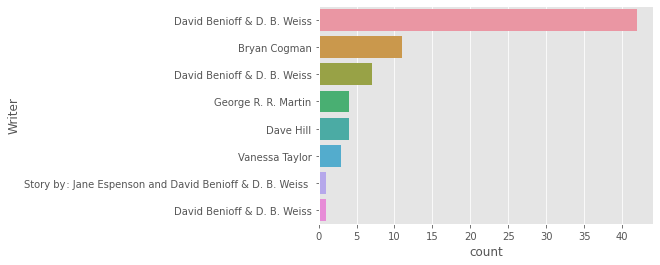

In [109]:
# Bar plots of counts
sns.countplot(y="Writer", data=datacat, order = datacat['Writer'].value_counts().index)
plt.show()

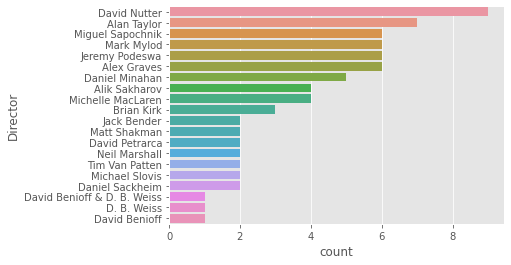

In [110]:
sns.countplot(y="Director", data=datacat, order = datacat['Director'].value_counts().index)
plt.show()

## Continuous variables

There are a lot more options for continuous variables

Use the five number summary - with .describe

Boxplots are great ways to find outliers

Use histograms and kernel density estimators to visualize the distribution.

Know the shape of the distribution

Think about making categorical variables out of continuous variables by cutting 
them into bins.

**Outliers in one dimension**

    Use your natural human ability to look at boxplots to find thresholds for what an outlier might be

    Generate a new column of data that is 0/1 for outlier or not. This will quickly help you find them later.

**Grapical**

Histogram/rugplot/KDE, box/violin/swarm, qqplot, fat tails	

**Non-Graphical**

central tendency -mean/median/mode, spread - variance, std, skew, kurt, IQR

In [24]:
# Basic Statistic of numerical variables
datanum.describe().T

,count,mean,std,min,25%,50%,75%,max
Season,73.0,4.205479,2.191897,1.0,2.0,4.00,6.00,8.00
Episode Number,73.0,37.000000,21.217131,1.0,19.0,37.00,55.00,73.00
Number in Season,73.0,5.191781,2.821827,1.0,3.0,5.00,7.00,10.00
US viewers (million),73.0,6.446712,2.825016,2.2,3.9,6.64,7.82,13.61
Runtime (mins),73.0,57.726027,7.251935,50.0,53.0,56.00,59.00,82.00
IMDB votes,73.0,40185.000000,44304.997159,16496.0,18075.0,23207.00,32906.00,216879.00
Imdb Rating,73.0,8.891781,0.931360,4.1,8.7,9.00,9.40,9.90
Notable Death Count,73.0,3.178082,2.394104,0.0,1.0,3.00,4.00,11.00


In [25]:
datanum.columns

Index(['Season', 'Episode Number', 'Number in Season', 'US viewers (million)',
       'Runtime (mins)', 'IMDB votes', 'Imdb Rating', 'Notable Death Count'],
      dtype='object')

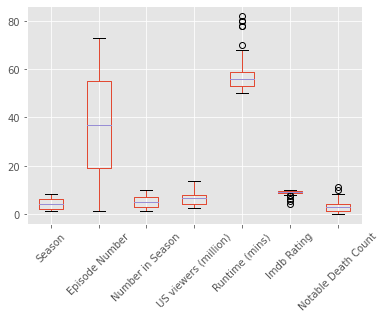

In [111]:
boxplot = datanum.boxplot(column=['Season', 'Episode Number', 'Number in Season', 'US viewers (million)',
       'Runtime (mins)', 'Imdb Rating', 'Notable Death Count'], rot=45)
# Outliers in Runtime, Imdb Rating and Notable Death Count

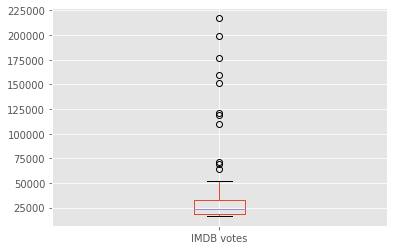

In [112]:
# Outliers in Imdb Votes
boxplotimdbvotes = datanum.boxplot(column=['IMDB votes'])


In [115]:
# Outliers in Imdb Votes episodes with more than 50000 votes
imdbvotesOutliers = data[data['IMDB votes'] > 50000]
imdbvotesOutliers

,Season,Episode Number,Number in Season,Episode Name,Director,Writer,Original Air Date,US viewers (million),Runtime (mins),IMDB Description,IMDB votes,Imdb Rating,Notable Death Count
28,3,29,9,The Rains of Castamere,David Nutter,David Benioff & D. B. Weiss,"June 2, 2013",5.22,51,Robb and Catelyn arrive at the Twins for the w...,68630,9.9,8
47,5,48,8,Hardhome,Miguel Sapochnik,David Benioff & D. B. Weiss,"May 31, 2015",7.01,61,Tyrion advises Daenerys. Sansa forces Theon to...,71476,9.9,4
54,6,55,5,The Door,Jack Bender,David Benioff & D. B. Weiss,"May 22, 2016",7.89,57,Sansa and Jon make plans. Arya is given anothe...,51836,9.7,5
58,6,59,9,Battle of the Bastards,Miguel Sapochnik,David Benioff & D. B. Weiss,"June 19, 2016",7.66,60,Jon and Sansa face Ramsay Bolton on the fields...,159082,9.9,4
59,6,60,10,The Winds of Winter,Miguel Sapochnik,David Benioff & D. B. Weiss,"June 26, 2016",8.89,68,Cersei and Loras Tyrell stand trial by the god...,109392,9.9,11
63,7,64,4,The Spoils of War,Matt Shakman,David Benioff & D. B. Weiss,"August 6, 2017",10.17,50,Daenerys takes matters into her own hands. Ary...,64201,9.8,0
67,8,68,1,Winterfell,David Nutter,Dave Hill,"April 14, 2019",11.76,54,Jon and Daenerys arrive in Winterfell and are ...,120508,7.6,1
68,8,69,2,A Knight of the Seven Kingdoms,David Nutter,Bryan Cogman,"April 21, 2019",10.29,58,Jaime faces judgment and Winterfell prepares f...,118605,7.9,0
69,8,70,3,The Long Night,Miguel Sapochnik,David Benioff & D. B. Weiss,"April 28, 2019",12.02,82,The Night King and his army have arrived at Wi...,198482,7.5,7
70,8,71,4,The Last of the Starks,David Nutter,David Benioff & D. B. Weiss,"May 5, 2019",11.80,78,The Battle of Winterfell is over and a new cha...,151229,5.5,2


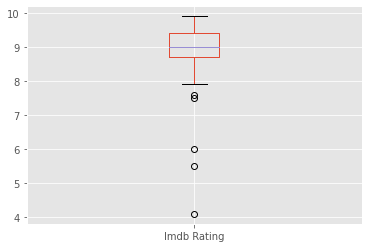

In [116]:
boxplotImdbRating = datanum.boxplot(column=['Imdb Rating'])


In [118]:
# Outliers in Imdb Ratings episodes with less than 7.8 rating
ImdbRatingsOutliers = data[data['Imdb Rating'] < 7.8]
ImdbRatingsOutliers

# All Espisodes are from 8 season

,Season,Episode Number,Number in Season,Episode Name,Director,Writer,Original Air Date,US viewers (million),Runtime (mins),IMDB Description,IMDB votes,Imdb Rating,Notable Death Count
67,8,68,1,Winterfell,David Nutter,Dave Hill,"April 14, 2019",11.76,54,Jon and Daenerys arrive in Winterfell and are ...,120508,7.6,1
69,8,70,3,The Long Night,Miguel Sapochnik,David Benioff & D. B. Weiss,"April 28, 2019",12.02,82,The Night King and his army have arrived at Wi...,198482,7.5,7
70,8,71,4,The Last of the Starks,David Nutter,David Benioff & D. B. Weiss,"May 5, 2019",11.80,78,The Battle of Winterfell is over and a new cha...,151229,5.5,2
71,8,72,5,The Bells,Miguel Sapochnik,David Benioff & D. B. Weiss,"May 12, 2019",12.40,78,Forces have arrived at King's Landing for the ...,176140,6.0,7
72,8,73,6,The Iron Throne,David Benioff & D. B. Weiss,David Benioff & D. B. Weiss,"May 19, 2019",13.61,80,In the aftermath of the devastating attack on ...,216879,4.1,1


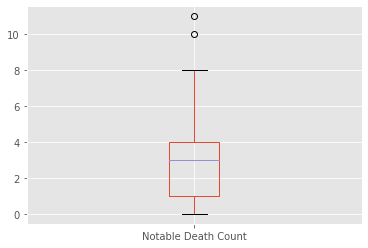

In [119]:

boxplotNotableDeathCount = datanum.boxplot(column=['Notable Death Count'])


In [120]:
# Outliers in Notable Death Count episodes with more than 8 deaths
NotableDeathCountOutliers = data[data['Notable Death Count'] > 8]
NotableDeathCountOutliers



,Season,Episode Number,Number in Season,Episode Name,Director,Writer,Original Air Date,US viewers (million),Runtime (mins),IMDB Description,IMDB votes,Imdb Rating,Notable Death Count
38,4,39,9,The Watchers on the Wall,Neil Marshall,David Benioff & D. B. Weiss,"June 8, 2014",6.95,51,The battle between the Night's Watch and the w...,30073,9.6,10
59,6,60,10,The Winds of Winter,Miguel Sapochnik,David Benioff & D. B. Weiss,"June 26, 2016",8.89,68,Cersei and Loras Tyrell stand trial by the god...,109392,9.9,11


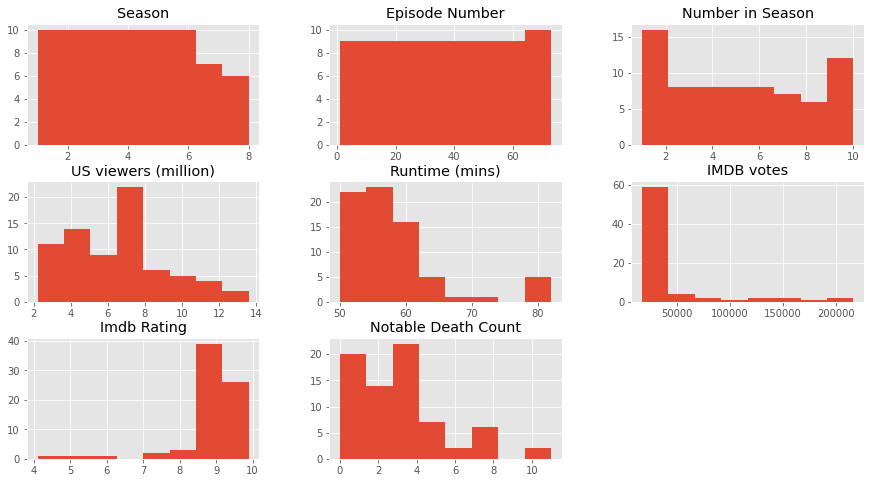

In [121]:
hist = datanum.hist(bins=8, figsize=(15,8))


# Bivariate Analysis


**Categorical vs Categorical**
> Create two way contingency table of frequency counts

>Create a heat map

>Find expected counts and possibly do a chi-squared test




**Categorical vs Continuous**
Use the seaborn categorical plots

**Continuous vs Continuous**
Plot all combinations of scatterplots

Use a hierarchical clustering plot


## Categorical vs Categorical

In [31]:
datacat.columns

Index(['Episode Name', 'Director', 'Writer', 'IMDB Description'], dtype='object')

In [32]:
# Writers and Directors that worked together
data_crosstab = pd.crosstab(datacat['Director'],  
                            datacat['Writer'], 
                                margins = False) 
data_crosstab

Writer,Bryan Cogman,Dave Hill,David Benioff & D. B. Weiss,David Benioff & D. B. Weiss,David Benioff & D. B. Weiss,George R. R. Martin,Story by : Jane Espenson and David Benioff & D. B. Weiss,Vanessa Taylor
Director,,,,,,,,
Alan Taylor,0,0,6,0,1,0,0,0
Alex Graves,1,0,4,0,0,1,0,0
Alik Sakharov,2,0,2,0,0,0,0,0
Brian Kirk,1,0,2,0,0,0,0,0
D. B. Weiss,0,0,0,1,0,0,0,0
Daniel Minahan,0,0,1,0,1,1,1,1
Daniel Sackheim,0,0,2,0,0,0,0,0
David Benioff,0,0,1,0,0,0,0,0
David Benioff & D. B. Weiss,0,0,1,0,0,0,0,0


In [37]:
# What season did Directors worked on.
data_directorseason = pd.crosstab(datacat['Director'],  
                                  datanum['Season'], 
                                margins = False) 
data_directorseason

Season,1,2,3,4,5,6,7,8
Director,,,,,,,,
Alan Taylor,2,4,0,0,0,0,1,0
Alex Graves,0,0,2,4,0,0,0,0
Alik Sakharov,0,1,1,2,0,0,0,0
Brian Kirk,3,0,0,0,0,0,0,0
D. B. Weiss,0,0,0,1,0,0,0,0
Daniel Minahan,3,0,2,0,0,0,0,0
Daniel Sackheim,0,0,0,0,0,2,0,0
David Benioff,0,0,1,0,0,0,0,0
David Benioff & D. B. Weiss,0,0,0,0,0,0,0,1


In [38]:
# What season did Writers worked on.
data_WriterSeason = pd.crosstab(datacat['Writer'],  
                                  datanum['Season'], 
                                margins = False) 
data_WriterSeason

Season,1,2,3,4,5,6,7,8
Writer,,,,,,,,
Bryan Cogman,1,1,1,2,2,2,1,1
Dave Hill,0,0,0,0,1,1,1,1
David Benioff & D. B. Weiss,6,5,6,6,6,6,4,3
David Benioff & D. B. Weiss,0,0,0,1,0,0,0,0
David Benioff & D. B. Weiss,1,1,1,0,1,1,1,1
George R. R. Martin,1,1,1,1,0,0,0,0
Story by : Jane Espenson and David Benioff & D. B. Weiss,1,0,0,0,0,0,0,0
Vanessa Taylor,0,2,1,0,0,0,0,0


## Continuous vs Continuous

In [39]:
datacat.columns, datanum.columns

(Index(['Episode Name', 'Director', 'Writer', 'IMDB Description'], dtype='object'),
 Index(['Season', 'Episode Number', 'Number in Season', 'US viewers (million)',
        'Runtime (mins)', 'IMDB votes', 'Imdb Rating', 'Notable Death Count'],
       dtype='object'))

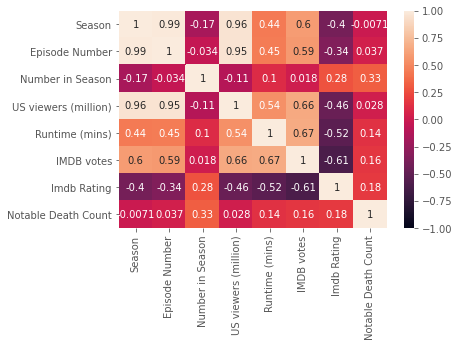

In [55]:
# US viewers full correlation
# Imdb Votes Strong correlation and Runtime
# Imdb Rating strong negative correlation
pearson_corr = datanum.corr()
ax = sns.heatmap(pearson_corr, vmin=-1, vmax=1, annot=True)

#US viewers full correlation with Season and Episode Number.
# Imdb Votes strong correlation with Runtime, US viewers, Season, Episode Number
# Runtime Strong correlation with US viewers, Season and Episode Number
# Imdb Rating strong negative correlation with Imdb votes, Runtime, US viewers, episode number and Season.

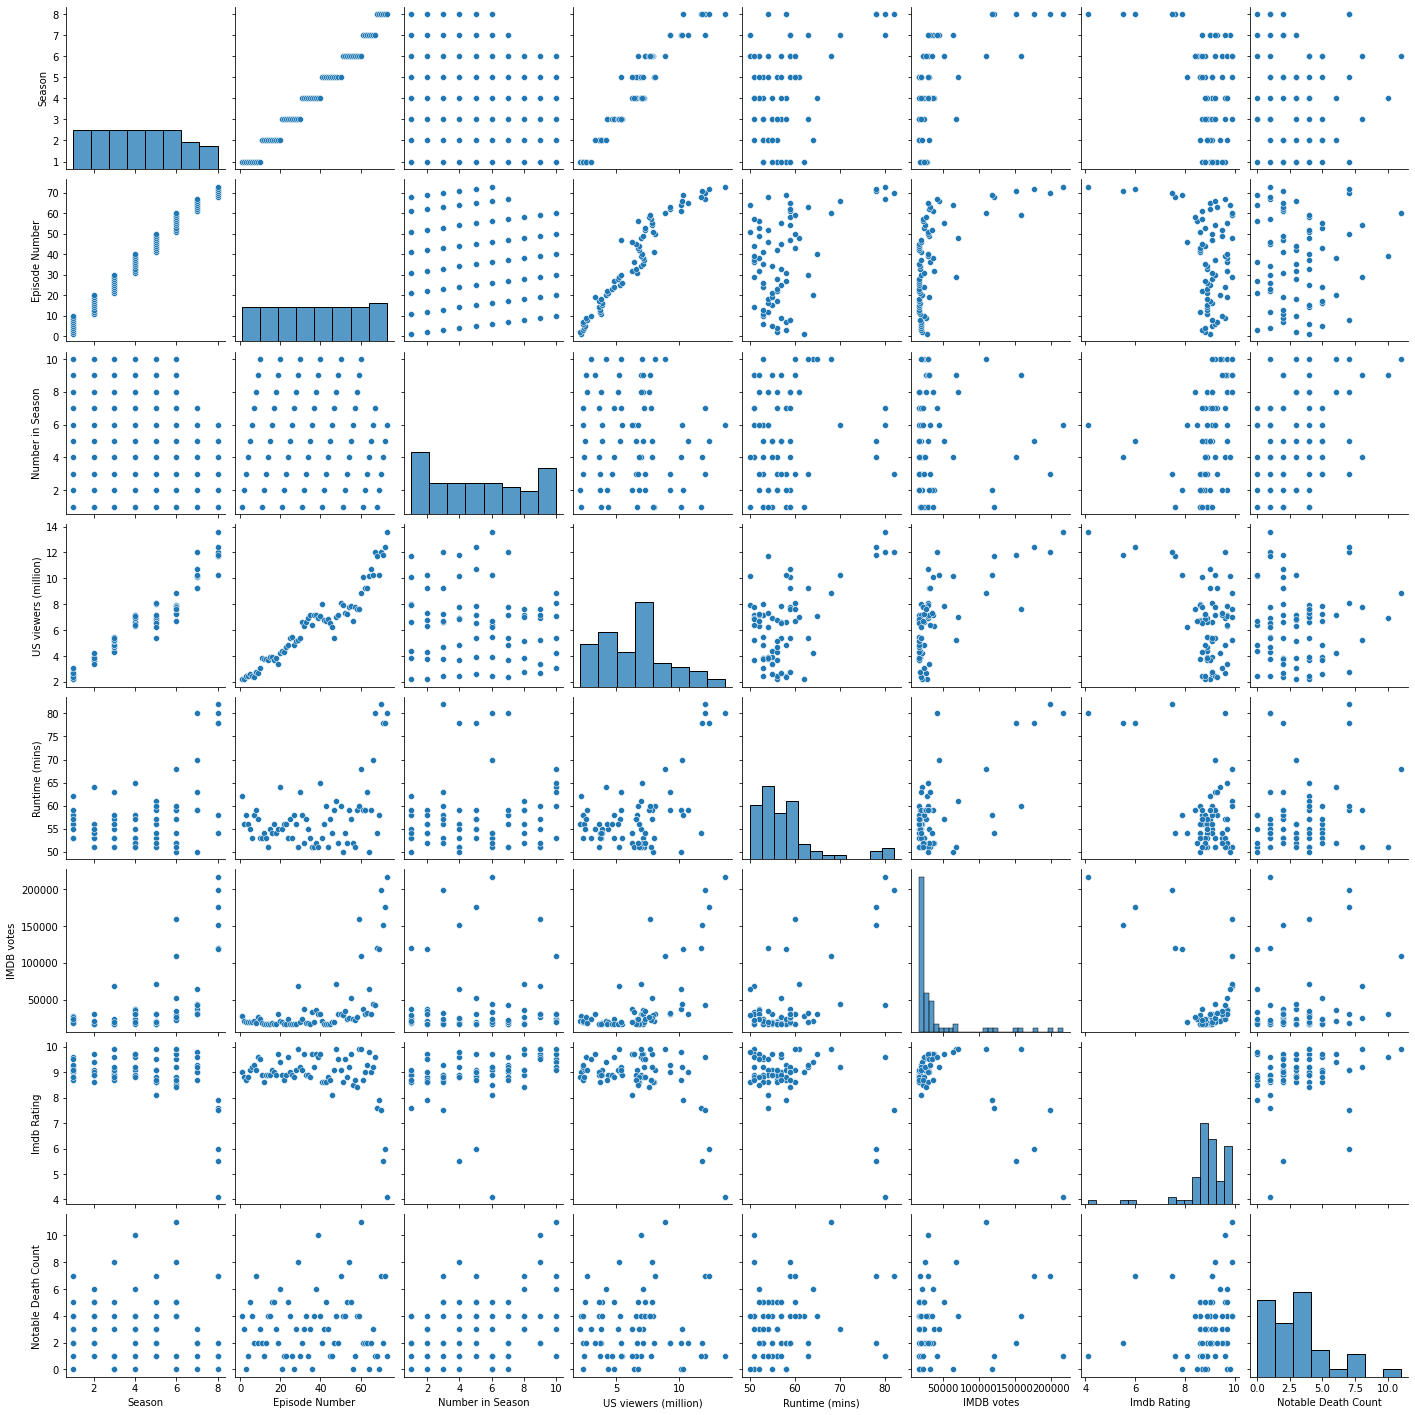

In [40]:
# gold mine of useful data 
sns.pairplot(datanum)


## Categorical vs Continuous

In [56]:
datanum.columns, datacat.columns

(Index(['Season', 'Episode Number', 'Number in Season', 'US viewers (million)',
        'Runtime (mins)', 'IMDB votes', 'Imdb Rating', 'Notable Death Count'],
       dtype='object'),
 Index(['Episode Name', 'Director', 'Writer', 'IMDB Description'], dtype='object'))

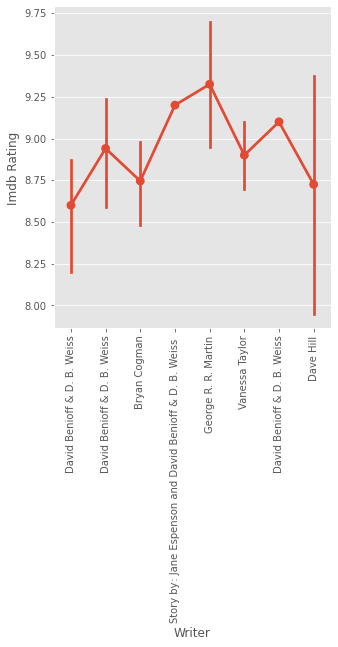

In [73]:
# Mean and distribution of Imdb Rating per Writer
g = sns.catplot(x="Writer", y="Imdb Rating",  data=data, kind="point")
g.set_xticklabels(rotation=90)


In [95]:
# Best Writers per US viewers (million)
data.groupby('Writer', as_index=False).agg({'US viewers (million)':'mean',
                           'Episode Number':'count'}).sort_values(by='US viewers (million)', ascending=False)


,Writer,US viewers (million),Episode Number
1,Dave Hill,9.147500,4
4,David Benioff & D. B. Weiss,6.931429,7
3,David Benioff & D. B. Weiss,6.640000,1
2,David Benioff & D. B. Weiss,6.561429,42
0,Bryan Cogman,6.526364,11
5,George R. R. Martin,4.312500,4
7,Vanessa Taylor,3.933333,3
6,Story by : Jane Espenson and David Benioff & D...,2.440000,1


In [97]:
# Best Writers per Imdb Rating
data.groupby('Writer', as_index=False)['Imdb Rating'].mean().sort_values(by='Imdb Rating', ascending=False)



,Writer,Imdb Rating
5,George R. R. Martin,9.325000
6,Story by : Jane Espenson and David Benioff & D...,9.200000
3,David Benioff & D. B. Weiss,9.100000
2,David Benioff & D. B. Weiss,8.940476
7,Vanessa Taylor,8.900000
0,Bryan Cogman,8.745455
1,Dave Hill,8.725000
4,David Benioff & D. B. Weiss,8.600000


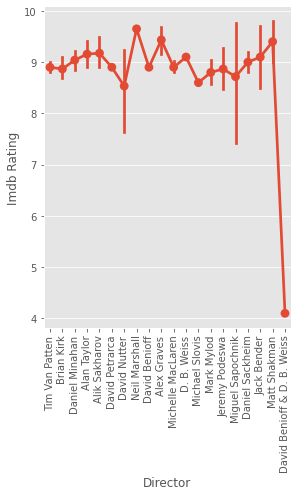

In [74]:
# Mean and distribution of Imdb Rating per Director

ga = sns.catplot(x="Director", y="Imdb Rating",  data=data, kind="point")
ga.set_xticklabels(rotation=90)


In [94]:
# Best Directors per US viewers (million)
# data.groupby('Director', as_index=False)['US viewers (million)'].mean().sort_values(by='US viewers (million)', ascending=False)

data.groupby('Director', as_index=False).agg({'US viewers (million)':'mean',
                           'Episode Number':'count'}).sort_values(by='US viewers (million)', ascending=False)


,Director,US viewers (million),Episode Number
8,David Benioff & D. B. Weiss,13.610000,1
14,Matt Shakman,10.445000,2
17,Miguel Sapochnik,8.896667,6
12,Jeremy Podeswa,8.368333,6
13,Mark Mylod,7.908333,6
6,Daniel Sackheim,7.550000,2
9,David Nutter,7.475556,9
15,Michael Slovis,7.405000,2
11,Jack Bender,7.300000,2
4,D. B. Weiss,6.640000,1


# Answering Questions

Which season is the most popular? 

Is there are link between ratings and viewer figures? 

Do certain writers and directors make better episodes? 

Can you extract any relevant information from the episode descriptions?


In [99]:
datanum.columns, datacat.columns

(Index(['Season', 'Episode Number', 'Number in Season', 'US viewers (million)',
        'Runtime (mins)', 'IMDB votes', 'Imdb Rating', 'Notable Death Count'],
       dtype='object'),
 Index(['Episode Name', 'Director', 'Writer', 'IMDB Description'], dtype='object'))

In [98]:
# Which season is the most popular? 
data.groupby('Season', as_index=False)['US viewers (million)'].mean().sort_values(by='US viewers (million)', ascending=False)



,Season,US viewers (million)
7,8,11.980000
6,7,10.261429
5,6,7.688000
4,5,6.880000
3,4,6.846000
2,3,4.966000
1,2,3.795000
0,1,2.515000


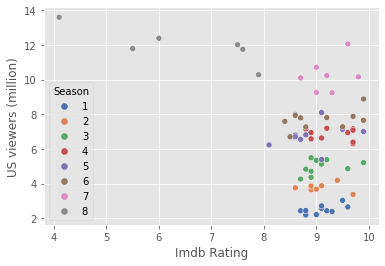

In [102]:
# Is there are link between ratings and viewer figures? 

### Most popular episodes have low ratings. Last Season has much more lower ratings than first 7 where ratings are constant.
sns.scatterplot(data=data, x="Imdb Rating", y='US viewers (million)', hue='Season', palette="deep")


In [104]:
data.groupby('Season', as_index=False).agg({'Imdb Rating':'mean',
                           'US viewers (million)':'mean'}).sort_values(by='US viewers (million)', ascending=False)
# Season 8 has 6.43 average ratings, first 7 seasons have ratings between 8.9 to 9.33 millions.
# HBO have constant rise in US viewers from first to last season. 

,Season,Imdb Rating,US viewers (million)
7,8,6.433333,11.980000
6,7,9.228571,10.261429
5,6,9.120000,7.688000
4,5,8.900000,6.880000
3,4,9.330000,6.846000
2,3,9.100000,4.966000
1,2,9.030000,3.795000
0,1,9.110000,2.515000


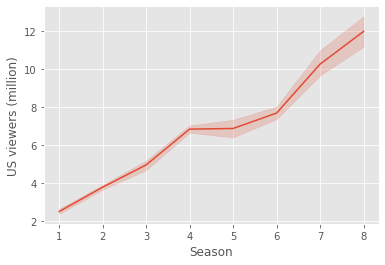

In [106]:
# rise in US viewers from first to last season.
sns.lineplot(data=data, x="Season", y="US viewers (million)")


In [107]:
# Best Directors per Imdb Ratings: Neil Marshall, Alex Graves, Matt Shakman

data.groupby('Director', as_index=False).agg({'Imdb Rating':'mean',
                           'Episode Number':'count'}).sort_values(by='Imdb Rating', ascending=False)


,Director,Imdb Rating,Episode Number
18,Neil Marshall,9.650000,2
1,Alex Graves,9.433333,6
14,Matt Shakman,9.400000,2
2,Alik Sakharov,9.175000,4
0,Alan Taylor,9.157143,7
4,D. B. Weiss,9.100000,1
11,Jack Bender,9.100000,2
5,Daniel Minahan,9.040000,5
6,Daniel Sackheim,9.000000,2
10,David Petrarca,8.900000,2


In [108]:
# Best Writers per Imdb Ratings: George R. R. Martin, David Benioff & D. B. Weiss, Vanessa Taylor

data.groupby('Writer', as_index=False).agg({'Imdb Rating':'mean',
                           'Episode Number':'count'}).sort_values(by='Imdb Rating', ascending=False)


,Writer,Imdb Rating,Episode Number
5,George R. R. Martin,9.325000,4
6,Story by : Jane Espenson and David Benioff & D...,9.200000,1
3,David Benioff & D. B. Weiss,9.100000,1
2,David Benioff & D. B. Weiss,8.940476,42
7,Vanessa Taylor,8.900000,3
0,Bryan Cogman,8.745455,11
1,Dave Hill,8.725000,4
4,David Benioff & D. B. Weiss,8.600000,7


# There is 8 seasonso of GoT and 73 episodes

# Average number of  US viewers are 6.44 millions, minimum was 2.2 and maximum was 13.61.

# Average runtime per episode is 57.72 minutes, minimum was 50 and max was 82.

# Imdb average votes per episode is 40185, min is 16496 and max was 216879

# Average Imdb rating is 8.89, min 4.1 and max is 9.9

# Deaths per episode was 3.17 on average, with max number 11.

# There is 8 Different Writers and 20 Directors

# David Benioff & D. B. Weiss have written most episodes 42 out of 73.

# David Nutter Directed most number of epiodes 9.

# First Episode is aired on May 15, 2011

# David Nutter 9,Alan Taylor 7,Miguel Sapochnik 6,Mark Mylod 6,Jeremy Podeswa 6,Alex Graves 6 have Directed most episodes.

# Outliers in Runtime, Imdb Rating and Notable Death Count

#US viewers full correlation with Season and Episode Number.

# Imdb Votes strong correlation with Runtime, US viewers, Season, Episode Number

# Runtime Strong correlation with US viewers, Season and Episode Number

# Imdb Rating strong negative correlation with Imdb votes, Runtime, US viewers,episode number and Season.

### Most popular episodes have low ratings. Last Season has much more lower ratings than first 7 where ratings are constant.

# Season 8 has 6.43 average ratings, first 7 seasons have ratings between 8.9 to 9.33 millions.

# HBO have constant rise in US viewers from first to last season. 

# Best Directors per Imdb Ratings: Neil Marshall, Alex Graves, Matt Shakman

# Best Writers per Imdb Ratings: George R. R. Martin, David Benioff & D. B. Weiss, Vanessa Taylor
